## Exercise 1

The probability distribution function of a discrete variable $k$ is given by the zero-truncated Poisson distribution: 
$$ P(k) = \frac{\lambda^k e^{-\lambda}}{k! (1 - e^{-\lambda})} $$ 
for $k = 1, 2, 3, ...$ 

### 1\.Write the R functions for the probability density and cumulative distribution functions, using the R naming convention, assuming λ = 1.4.

In [1]:
library(ggplot2)

In [2]:
lambda <- 1.4
k <- 1:10
n <- length(k)


poissonian <- function(k, lambda) {
    numerator <- lambda^k * exp(-lambda)
    denominator <- factorial(k) * (1 - exp(-lambda))
    return(numerator / denominator)
}

ppois_custom <- function(n, k, lambda) {
    cdf <- rep(0, n)
    for (i in 1:n) {
        cdf[i] <- sum(sapply(0:i, function(j) poissonian(j, lambda)))
    }
    return(cdf)
}

### 2\. Produce two plots showing the pdf and cdf, separately

In [3]:
pdf_values <- poissonian(k, lambda)
print("PDF values:")
print(pdf_values)

# Calculate cdf values
cdf_values <- ppois_custom(n, k, lambda)
print("CDF values:")
print(cdf_values)

[1] "PDF values:"
 [1] 4.582351e-01 3.207646e-01 1.496901e-01 5.239155e-02 1.466963e-02
 [6] 3.422915e-03 6.845829e-04 1.198020e-04 1.863587e-05 2.609022e-06
[1] "CDF values:"
 [1] 0.785546 1.106311 1.256001 1.308392 1.323062 1.326485 1.327169 1.327289
 [9] 1.327308 1.327310


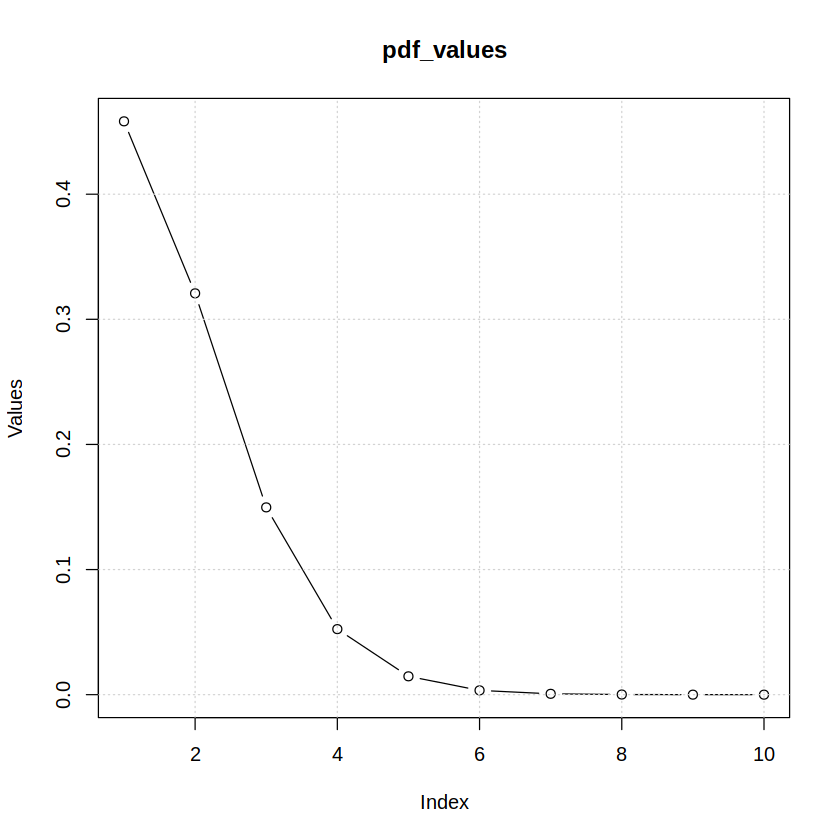

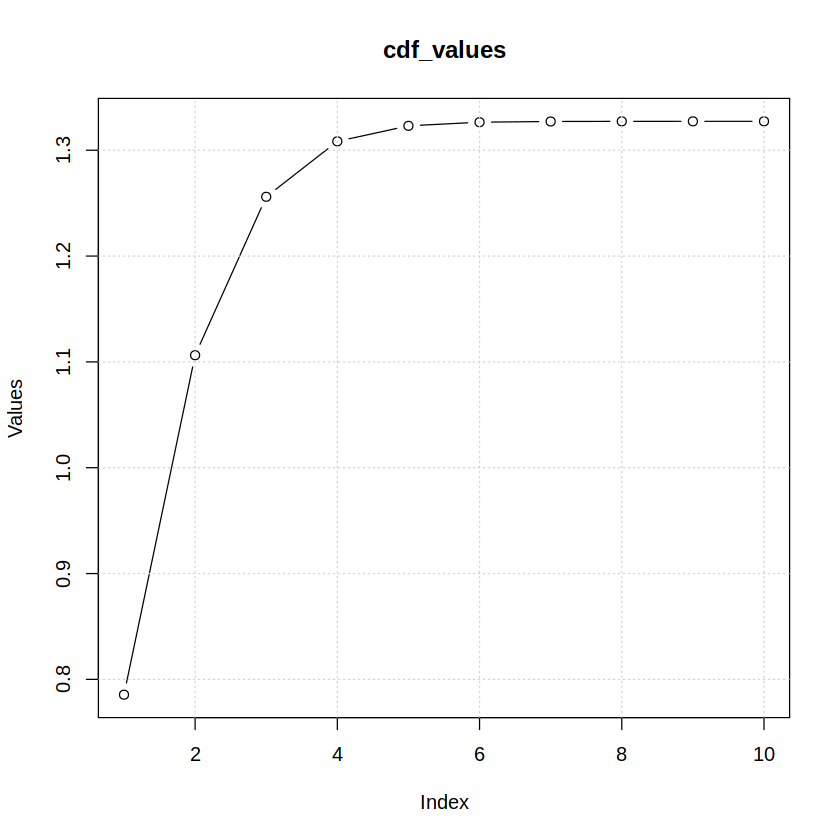

In [4]:
plot(k, pdf_values, type = "b", xlab = "Index", ylab = "Values", main = "pdf_values")
grid()

plot(k, cdf_values, type = "b", xlab = "Index", ylab = "Values", main = "cdf_values")
grid()

### 3\. Compute the mean value and variance of the probability distribution using R.

In [5]:
k_mean <- sum(k*poissonian(k,lambda))
k_var <- sum(k^2 *poissonian(k,lambda)) - k_mean^2

sprintf("The mean value of k is %.1f", k_mean)
sprintf("The variance of k is %.1f", k_var)

[1] "The mean value of k is 1.9"

[1] "The variance of k is 1.0"

### 4\. Generate a sample of random numbers from this distribution and show them in an histogram. Evaluate the sample mean

[1] "The sample mean is 1.9"

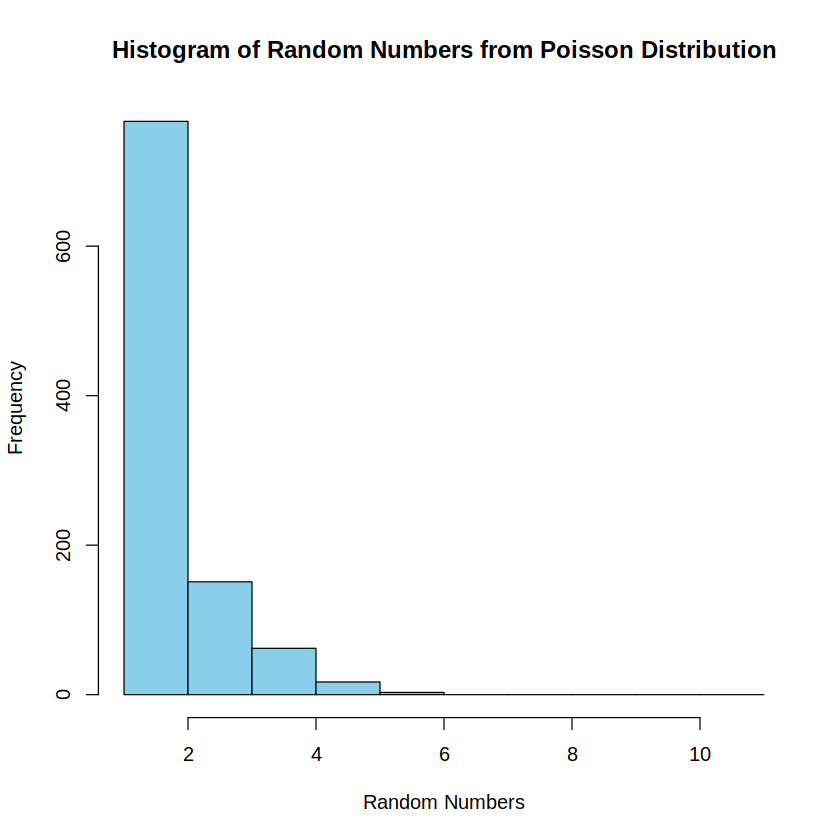

In [6]:
N = 1000
sample <- sample(x=k, size=N, replace=TRUE, prob=pdf_values)

bin_width <- 1
breaks <- seq(min(k), max(k) + bin_width, by = bin_width)
hist(sample, breaks = breaks, col = "skyblue", main = "Histogram of Random Numbers from Poisson Distribution", xlab = "Random Numbers")

mean <- sum(sample)/N
sprintf("The sample mean is %.1f", mean)

## Exercise 2

The energy distribution of CR muons at sea level can be approximated as follows
$$ p(E) = N \begin{equation*}
    \begin{cases}
      1 \quad  \quad  \quad  \quad  \quad \text{for}  \quad  E < E_0\\
      (E-E_0 + 1)^{-\gamma}  \quad  \quad  \quad  \quad  \quad \text{for}  \quad  E > E_0
    \end{cases}\
\end{equation*} $$

where $E0 = 7.25$ GeV and $\gamma = 2.7$.

### 1\. Compute the normalisation factor N using R.


In [7]:
E0 <- 7.25
gamma <- 2.7

#function without N

func_no_N <- function(E, E0, gamma) {
  ifelse (E < E0, res <- 1, res <- (E - E0 + 1)^(-gamma))
}

integral <- integrate(func_no_N, lower = 0, upper = Inf, E0 = E0, gamma = gamma)
sprintf("The value of the integral is %.1f", integral$value)

N <- 1/ (integral$value)
sprintf("The value of N is %.1f", N)

func_with_N <- Vectorize(function(E, E0, gamma) {
  ifelse (E < E0, res <- N, res <- N*(E - E0 + 1)^(-gamma))
})

[1] "The value of the integral is 7.8"

[1] "The value of N is 0.1"

### 2\. Plot the probability density function in R.

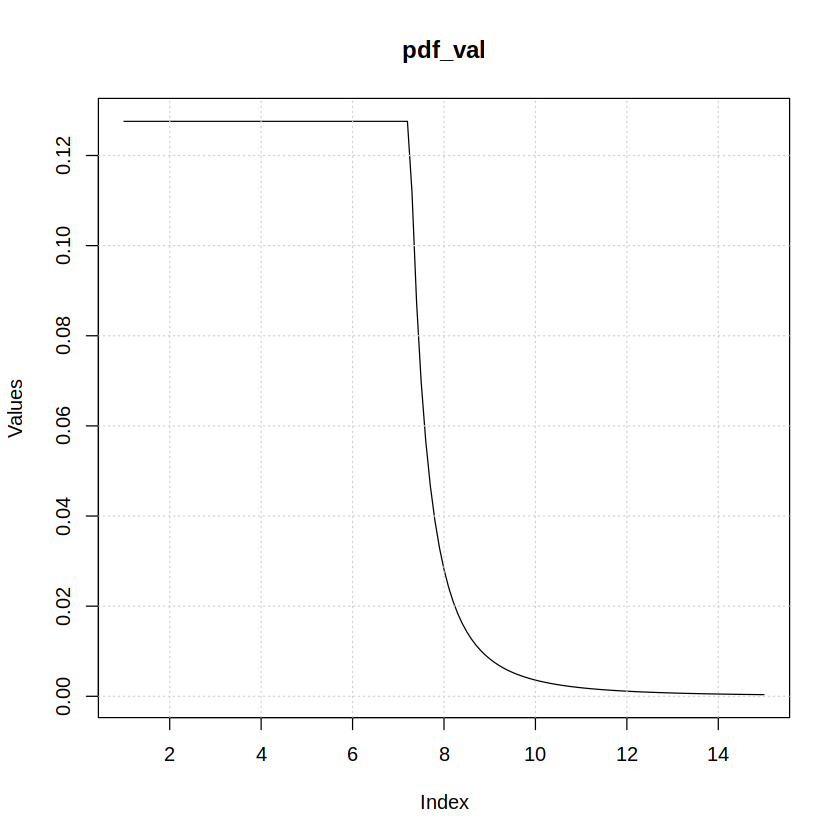

In [8]:
E <- seq(1, 15, 0.1)

pdf_val <- func_with_N(E, E0, gamma)
plot(E, pdf_val, type = "l", xlab = "Index", ylab = "Values", main = "pdf_val")
grid()

### 3\. Plot the cumulative density function in R.

In [9]:
cum_func <- Vectorize(function(E, E0, gamma) {
    integral <- integrate(func_with_N, lower = 0, upper = E, E0 = E0, gamma = gamma)$value
    return (integral)
})

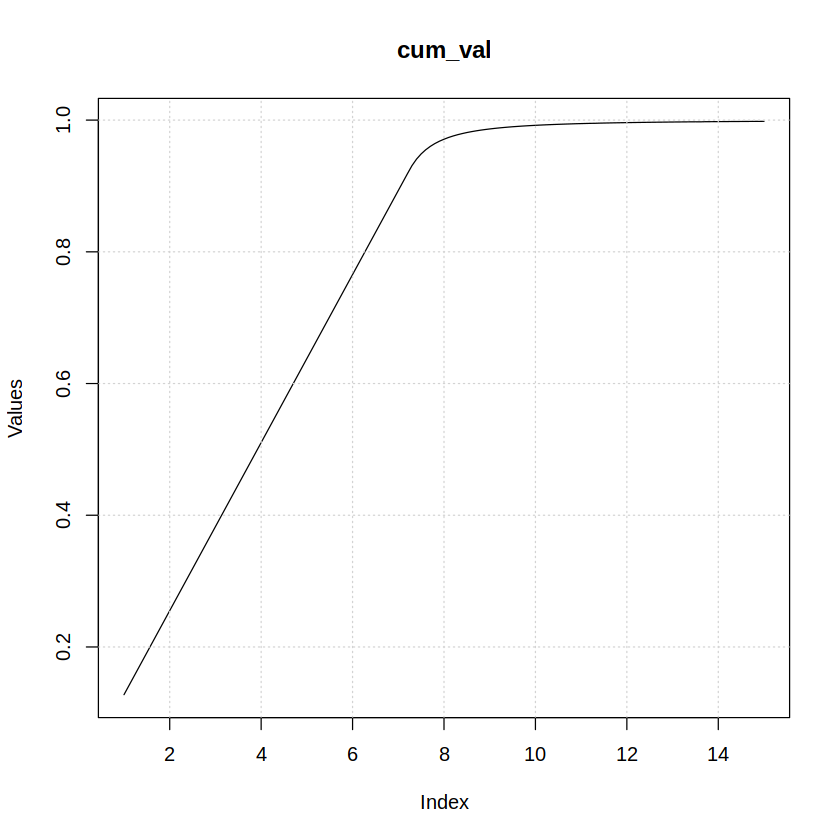

In [10]:
E <- seq(1, 15, 0.1)

cum_val <- cum_func(E, E0, gamma)

plot(E, cum_val, type = "l", xlab = "Index", ylab = "Values", main = "cum_val")
grid()

### 4\. Compute the mean value using R

In [11]:
mean_function <- Vectorize(function(E, E0, gamma) {
  ifelse (E < E0, res <- N*E, res <- (N*E)*(E - E0 + 1)^(-gamma))
})

In [12]:
E_mean <- integrate(mean_function, lower = 0, upper = Inf, E0 = E0, gamma = gamma)$value

sprintf("The mean value of E is %.1f", E_mean)

[1] "The mean value of E is 4.0"

## Exercise 3

Suppose that the average number of accidents at an intersection is two per day

### 1\. Using Markov’s inequality, find a bound for the probability that at least five accidents will occur tomorrow.


In [13]:
lambda <- 2
k <- 5

bound_markov <- lambda/k
sprintf("The boundary of the probability is %.1f", bound_markov)

[1] "The boundary of the probability is 0.4"

### 2\. Using Poisson random variables, calculate the probability that at least five accidents will occur tomorrow. Compare this value with the bound obtained in the previous point 1.


In [14]:
n <- 0:4
pois <- 1 - sum(dpois(n,lambda))
sprintf("The probability is %.1f", pois)

[1] "The probability is 0.1"

This value obtained with poissonian distribution is consistent with the Markov inequality

### 3\. Let the variance of the number of accidents be two per day. Using Chebyshev’s inequality, find a bound on the probability that tomorrow at least five accidents will occur.

In [15]:
variance <- 2

# In order to be consistent with the formula I must use k = 3
k <- 3

bound_cheb <- variance/ (k**2)
sprintf("The boundary for the probability is %.1f", bound_cheb)

[1] "The boundary for the probability is 0.2"

It is a better boundary in this situation

## Exercise 4

The waiting period from the time a book is ordered until it is received is a random variable with mean
seven days and standard deviation two days. If Helen wants to be 95% sure that she receives a book by
certain date, how early should she order the book?

In [16]:
sprintf("Helen needs to order it %.1f days before", qnorm(0.95, mean = 7, sd = 2))

[1] "Helen needs to order it 10.3 days before"

## Exercise 5

An ordinary deck of 52 cards is divided randomly into 26 pairs. Using Chebyshev’s inequality, find
an upper bound for the probability that, at most, 10 pairs consist of a black and a red card.

In [17]:
singol_mean <- 26/51
total_mean <- singol_mean * 26

singol_var <- singol_mean*(1-singol_mean)
total_var <- 26*singol_var

k <- total_mean - 10

bound_prob_cheb <- total_var/(k**2)
sprintf("The boundary for the probability is %.1f", bound_prob_cheb)

[1] "The boundary for the probability is 0.6"

## Exercise 6

In a stationary bus at the departure station, a passenger gets on the bus, on average every 30
seconds.

### 1\. Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability of having less than 4 passenger after 3 minutes.


In [18]:
p_more_than_6 = 1 - sum(dpois(0:6, 4))
p_less_than_4 = sum(dpois(0:3, 6))
sprintf("The probability of getting more than 6 passenger after 2 minutes is %.4f", p_more_than_6)
sprintf("The probability of having less than 4 passenger after 3 minutes is %.4f", p_less_than_4)

[1] "The probability of getting more than 6 passenger after 2 minutes is 0.1107"

[1] "The probability of having less than 4 passenger after 3 minutes is 0.1512"

### 2\. Simulate the distribution of the arrival time of the third passenger and superimpose the corresponding pdf.

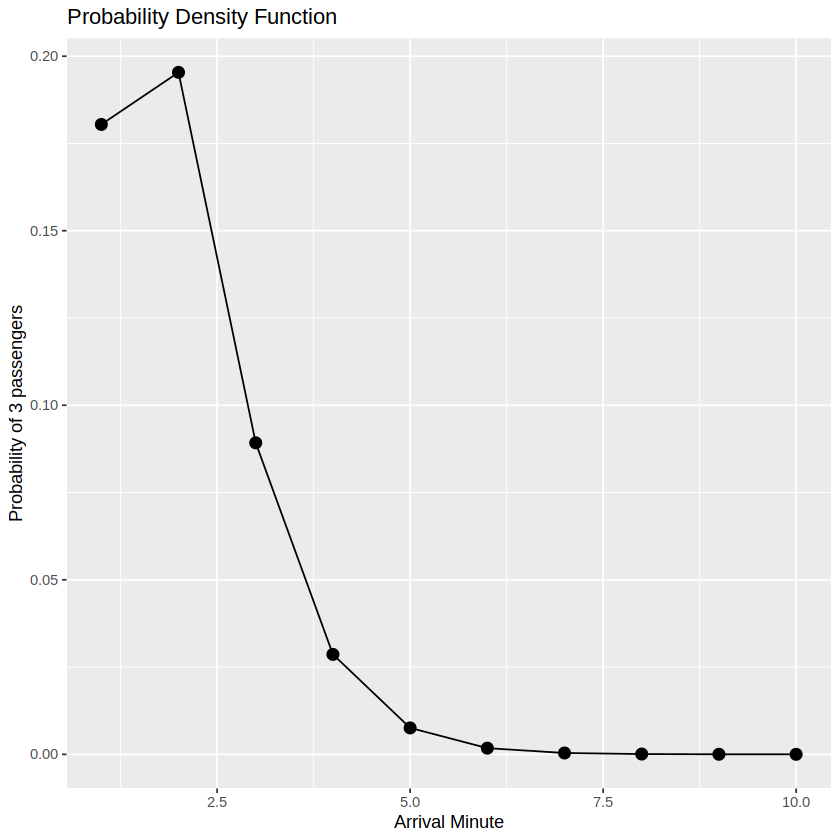

In [19]:
min = seq(1,10)
p = dpois(3, min*2)
ggplot(data.frame(x = min, y = p)) +
    geom_point(aes(x = x, y = y), size = 3) +
    geom_line(aes(x = x, y = y)) +
    labs(title = "Probability Density Function",
         x = "Arrival Minute",
         y = "Probability of 3 passengers")

### 3\. Repeat the procedure of the point 2 for the difference in arrival time between the fifth and the first passenger.

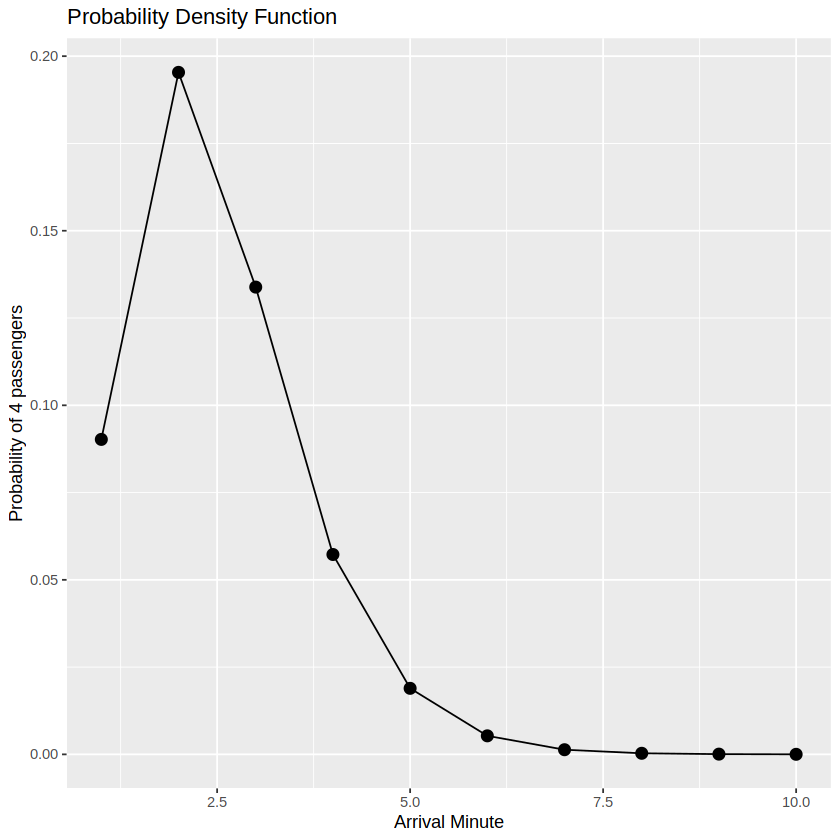

In [20]:
# It's equivalent to say: what is the probability of exaclty 4 passengers arrive in the bus

min = seq(1,10)
p = dpois(4, min*2)
ggplot(data.frame(x = min, y = p)) +
    geom_point(aes(x = x, y = y), size = 3) +
    geom_line(aes(x = x, y = y)) +
    labs(title = "Probability Density Function",
         x = "Arrival Minute",
         y = "Probability of 4 passengers")